In [ ]:

import pandas as pd
import csv
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

with open('INFLUD-14-07-2020.csv', 'rb') as f:
    result = chardet.detect(f.read())  

uri = 'INFLUD-14-07-2020.csv'
dados = pd.read_csv(uri, delimiter=';', encoding=result['encoding'], error_bad_lines=False, quoting=csv.QUOTE_NONE)
'''
import requests

DATASUS = 'https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-14-07-2020.csv'

dataset = requests.get(DATASUS, allow_redirects=True)

#open('datasets/datasus.csv', 'wb').write(dataset.content)

dados = pd.DataFrame(dataset)   
'''

### **Relações Raça**

In [167]:
'''
1-Branca
2-Preta
3-Amarela
4-Parda
5-Indígena
9-Ignorado
'''

dados_raca = {
    'etnia' : ['branca', 'preta', 'amarela', 'parda', 'indigena'],
    'casos' : [dados.query("CS_RACA ==  '1'").CS_RACA.value_counts().sum(), 
               dados.query("CS_RACA ==  '2'").CS_RACA.value_counts().sum(), 
               dados.query("CS_RACA ==  '3'").CS_RACA.value_counts().sum(), 
               dados.query("CS_RACA ==  '4'").CS_RACA.value_counts().sum(), 
               dados.query("CS_RACA ==  '5'").CS_RACA.value_counts().sum()]
    }




In [169]:
print('\n numero de casos com espaço preenchido: ', 
      sum(dados_raca['casos']), 
      '\n numero de casos totais no estudo: ', 
      len(dados), 
      '\n numero de casos com o espaço em branco/ignorado: ', 
      len(dados) - sum(dados_raca['casos']))


 numero de casos com espaço preenchido:  297397 
 numero de casos totais no estudo:  435717 
 numero de casos com o espaço em branco/ignorado:  138320


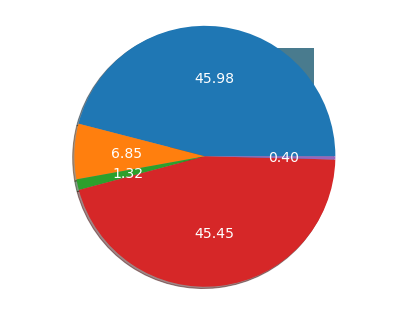

In [171]:
dados_racaBAR = sns.barplot(x='etnia', y='casos', data = dados_raca, palette = "GnBu_d")
dados_racaDF = pd.DataFrame(dados_raca)
dados_racaPIE = plt.pie(dados_raca['casos'], labels = dados_raca['etnia'], shadow=True, 
                radius=1.5, autopct='%.2f', textprops={'fontsize': 14, 'fontfamily': 'helvetica', 
                'fontweight': 'ultralight', 'color': 'white'})

In [172]:
dados_racaDF

,etnia,casos
0,branca,136744
1,preta,20374
2,amarela,3940
3,parda,135162
4,indigena,1177


### **Relações Escolaridade**

In [173]:
'''
0-Sem escolaridade/Analfabeto
1-Fundamental 1º ciclo
(1ª a 5ª série)
2-Fundamental 2º ciclo
(6ª a 9ª série)
3- Médio (1º ao 3º ano)
4-Superior
5-Não se aplica
9-Ignorado
'''

dados_escolaridade = {
    'escolaridade' : ['analfabeto ou sem escolaridade', 'fund1', 'fund2', 'medio', 'superior'],
    'casos' : [dados.query("CS_ESCOL_N == '0'").CS_ESCOL_N.value_counts().sum(), 
               dados.query("CS_ESCOL_N == '1'").CS_ESCOL_N.value_counts().sum(), 
               dados.query("CS_ESCOL_N == '2'").CS_ESCOL_N.value_counts().sum(), 
               dados.query("CS_ESCOL_N == '3'").CS_ESCOL_N.value_counts().sum(), 
               dados.query("CS_ESCOL_N == '4'").CS_ESCOL_N.value_counts().sum()]
    }

In [174]:
naoaplica = dados.query("CS_ESCOL_N == '5'").CS_ESCOL_N.value_counts().sum()

print('\n numero de casos com espaço preenchido: ', 
      sum(dados_escolaridade['casos'], naoaplica), 
      '\n numero de casos totais no estudo: ', 
      len(dados), 
      '\n numero de casos com o espaço em branco/ignorado: ', 
      len(dados) - (sum(dados_escolaridade['casos'], naoaplica)))


 numero de casos com espaço preenchido:  159303 
 numero de casos totais no estudo:  435717 
 numero de casos com o espaço em branco/ignorado:  276414


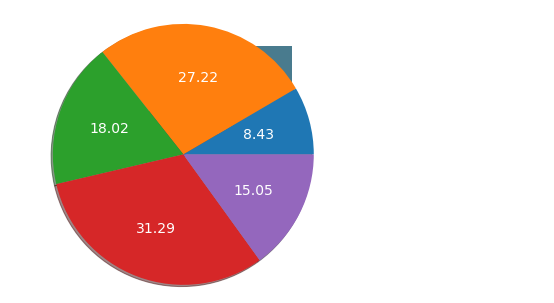

In [175]:
dados_escolaridadeBAR = sns.barplot(x='escolaridade', y='casos', data = dados_escolaridade, palette = "GnBu_d")
dados_escolaridadeDF = pd.DataFrame(dados_escolaridade)
dados_escolaridadePIE = plt.pie(dados_escolaridade['casos'], labels = dados_escolaridade['escolaridade'], shadow=True, 
                        radius=1.5, autopct='%.2f', textprops={'fontsize': 14, 'fontfamily': 'helvetica',
                        'fontweight': 'ultralight', 'color': 'white'})

In [176]:
dados_escolaridadeDF


,escolaridade,casos
0,analfabeto ou sem escolaridade,12208
1,fund1,39415
2,fund2,26090
3,medio,45314
4,superior,21796


### **Relações Raça-Escolaridade**


In [ ]:
preta_fund2 = dados.query("CS_RACA ==  '2' & CS_ESCOL_N == '2'")
preta_fund2

### **Relações Óbito-Raça**

In [178]:
obitos = dados.query("EVOLUCAO == '2'")

obitos_raca = {
    'etnia' : ['branca', 'preta', 'amarela', 'parda', 'indigena'],
    'obitos' : [obitos.query("CS_RACA ==  '1'").CS_RACA.value_counts().sum(),
                obitos.query("CS_RACA ==  '2'").CS_RACA.value_counts().sum(),
                obitos.query("CS_RACA ==  '3'").CS_RACA.value_counts().sum(), 
                obitos.query("CS_RACA ==  '4'").CS_RACA.value_counts().sum(), 
                obitos.query("CS_RACA ==  '5'").CS_RACA.value_counts().sum()]
    }

In [179]:

print('\n numero de casos com espaço preenchido: ', 
      sum(obitos_raca['obitos']), 
      '\n numero de casos totais no estudo: ', 
      len(dados), 
      '\n numero de casos com o espaço em branco: ', 
      len(dados) - sum(obitos_raca['obitos']))


 numero de casos com espaço preenchido:  73527 
 numero de casos totais no estudo:  435717 
 numero de casos com o espaço em branco:  362190


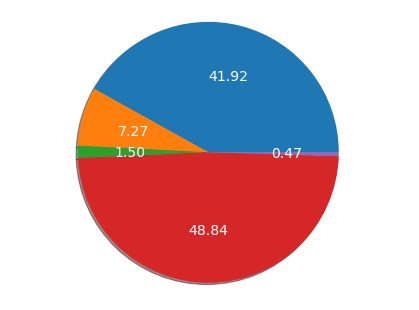

In [180]:
#obitos_racaBAR = sns.barplot(x='etnia', y='obitos', data = obitos_raca, palette = "GnBu_d")
obitos_racaDF = pd.DataFrame(obitos_raca)
obitos_racaPIE = plt.pie(obitos_raca['obitos'], labels = obitos_raca['etnia'], shadow=True, 
                radius=1.5, autopct='%.2f', textprops={'fontsize': 14, 'fontfamily': 'helvetica', 
                'fontweight': 'ultralight', 'color': 'white'})

In [181]:
obitos_racaDF

,etnia,obitos
0,branca,30821
1,preta,5343
2,amarela,1102
3,parda,35912
4,indigena,349


### **Relações Óbito-Escolaridade**

In [182]:
obitos = dados.query("EVOLUCAO == '2'")

obitos_escolaridade = {
    'escolaridade' : ['analfabeto ou sem escolaridade', 'fund1', 'fund2', 'medio', 'superior'],
    'obitos' : [obitos.query("CS_ESCOL_N ==  '0'").CS_ESCOL_N.value_counts().sum(),
                obitos.query("CS_ESCOL_N ==  '1'").CS_ESCOL_N.value_counts().sum(),
                obitos.query("CS_ESCOL_N ==  '2'").CS_ESCOL_N.value_counts().sum(), 
                obitos.query("CS_ESCOL_N ==  '3'").CS_ESCOL_N.value_counts().sum(), 
                obitos.query("CS_ESCOL_N ==  '4'").CS_ESCOL_N.value_counts().sum()]
    }


In [183]:
print('\n numero de casos com espaço preenchido: ', 
      sum(obitos_escolaridade['obitos']), 
      '\n numero de casos totais no estudo: ', 
      len(dados), 
      '\n numero de casos com os dois ou um espaço em branco: ', 
      len(dados) - sum(obitos_escolaridade['obitos']))


 numero de casos com espaço preenchido:  33443 
 numero de casos totais no estudo:  435717 
 numero de casos com os dois ou um espaço em branco:  402274


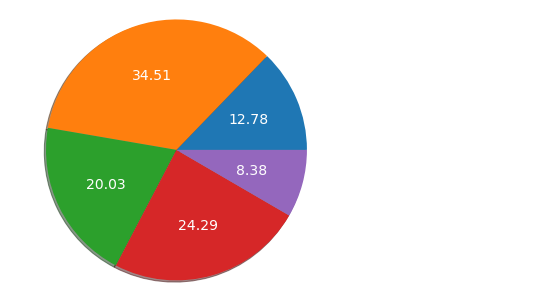

In [184]:
#obitos_escolaridadeBAR = sns.barplot(x='escolaridade', y='obitos', data = obitos_escolaridade, palette = "GnBu_d")
obitos_escolaridadeDF = pd.DataFrame(obitos_escolaridade)
obitos_escolaridadePIE = plt.pie(obitos_escolaridade['obitos'], labels = obitos_escolaridade['escolaridade'], shadow=True, 
                radius=1.5, autopct='%.2f', textprops={'fontsize': 14, 'fontfamily': 'helvetica', 
                'fontweight': 'ultralight', 'color': 'white'})

In [185]:
obitos_escolaridadeDF

,escolaridade,obitos
0,analfabeto ou sem escolaridade,4275
1,fund1,11542
2,fund2,6698
3,medio,8124
4,superior,2804
